In [2]:
# Question 1
# a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Emp_perf = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [28, 35, 42, 30, 50, 41, 29, 33, 45, 39],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Department": ["IT", "HR", "Finance", "Marketing", "Sales", "HR", "IT", "Finance", "Sales", "Marketing"],
    "Salary ($)": [70000, 60000, 90000, 65000, 85000, 62000, 75000, 88000, 87000, 67000],
    "Experience (Years)": [3, 7, 12, 5, 15, 9, 4, 11, 14, 6],
    "Work Hours/Week": [40, 38, 45, 42, 50, 37, 39, 44, 48, 41],
    "Projects Completed": [5, 4, 6, 7, 8, 5, 6, 7, 9, 6],
    "Job Satisfaction (1-10)": [7, 8, 6, 9, 5, 7, 8, 6, 5, 8],
    "Training Hours": [20, 15, 18, 25, 12, 16, 22, 20, 14, 19],
    "Promotion Status": ["No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"]
}

df = pd.DataFrame(Emp_perf)
display(df)


,ID,Age,Gender,Department,Salary ($),Experience (Years),Work Hours/Week,Projects Completed,Job Satisfaction (1-10),Training Hours,Promotion Status
0,1,28,Male,IT,70000,3,40,5,7,20,No
1,2,35,Female,HR,60000,7,38,4,8,15,Yes
2,3,42,Male,Finance,90000,12,45,6,6,18,Yes
3,4,30,Female,Marketing,65000,5,42,7,9,25,No
4,5,50,Male,Sales,85000,15,50,8,5,12,Yes
5,6,41,Female,HR,62000,9,37,5,7,16,No
6,7,29,Male,IT,75000,4,39,6,8,22,No
7,8,33,Female,Finance,88000,11,44,7,6,20,Yes
8,9,45,Male,Sales,87000,14,48,9,5,14,Yes
9,10,39,Female,Marketing,67000,6,41,6,8,19,No


In [11]:
# b)
# Overview of the data set
# i)
print(f" Total Columns : {len(df.columns)}")
print(f" Total Rows : {len(df.index)}")
# ii)
display(df.describe())
# iii)
print(f"Distinct values in the Department: {df['Department'].nunique()}")
print(f"Distinct values in the Promotion Status: {df['Promotion Status'].nunique()}")

 Total Columns : 11
 Total Rows : 10


,ID,Age,Salary ($),Experience (Years),Work Hours/Week,Projects Completed,Job Satisfaction (1-10),Training Hours
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,5.50000,37.200000,74900.000000,8.600000,42.400000,6.300000,6.90000,18.100000
std,3.02765,7.390685,11647.126493,4.247875,4.299871,1.494434,1.37032,3.928528
min,1.00000,28.000000,60000.000000,3.000000,37.000000,4.000000,5.00000,12.000000
25%,3.25000,30.750000,65500.000000,5.250000,39.250000,5.250000,6.00000,15.250000
50%,5.50000,37.000000,72500.000000,8.000000,41.500000,6.000000,7.00000,18.500000
75%,7.75000,41.750000,86500.000000,11.750000,44.750000,7.000000,8.00000,20.000000
max,10.00000,50.000000,90000.000000,15.000000,50.000000,9.000000,9.00000,25.000000


Distinct values in the Department: 5
Distinct values in the Promotion Status: 2


In [13]:
# Handling Missing Values
# i)
print(f"Finding dataset contain any missing value or not: \n {df.isna().sum()}")
# ii)
# Numerical Data: Replace missing values with the mean (for normally distributed data)
# or median (for skewed data).The median is more robust to outliers.

# Categorical Data: Replace missing values with the mode (most frequent value),
# as it represents the most common category.

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)



Finding dataset contain any missing value or not: 
 ID                         0
Age                        0
Gender                     0
Department                 0
Salary ($)                 0
Experience (Years)         0
Work Hours/Week            0
Projects Completed         0
Job Satisfaction (1-10)    0
Training Hours             0
Promotion Status           0
dtype: int64


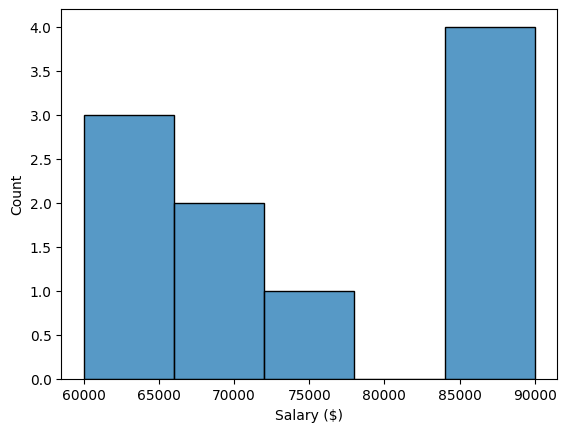

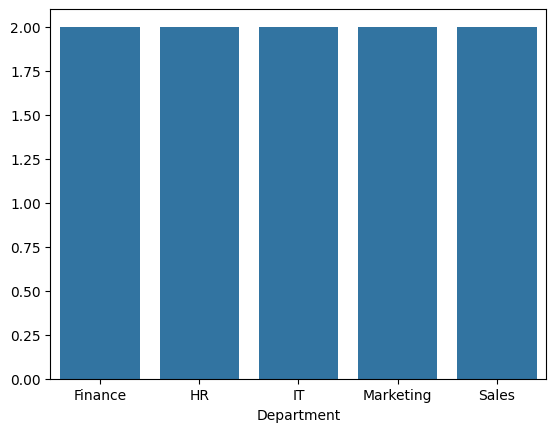

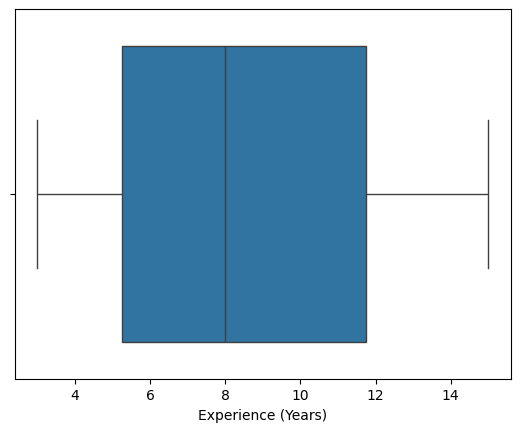

In [24]:
# Visual Analysis and Interpretation:
# i)
sns.histplot(x='Salary ($)',data = df)
plt.show()
# ii)
df1 = df.groupby('Department')
dep_counts = df1.size()
sns.barplot(x=dep_counts.index, y=dep_counts.values)
plt.show()
# iii)
sns.boxplot(x="Experience (Years)", data = df)
plt.show()
#